In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv("../../Datasets/telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df['Churn'].value_counts()#biased data

Churn
0    2850
1     483
Name: count, dtype: int64

In [14]:
corr=df.corr()
corr

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [15]:
X=df.drop(columns=['Churn' , 'OverageFee','DataPlan'])
y=df['Churn']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train[0:5])

[[ 1.56893149  0.34222967  1.99244701  0.32379678  0.63637764 -0.483756
   1.59816627  0.76610978]
 [ 1.44295764  0.34222967 -0.6363309  -0.43032079  0.54020619  0.55266086
  -0.08418037 -0.72660111]
 [ 0.33438774  0.34222967 -0.6363309   2.5861495  -0.621249    0.89813315
  -1.06300023 -0.44227523]
 [ 0.51075113  0.34222967 -0.6363309  -1.18443837 -1.43130852  0.45395449
  -1.67476264  0.16191728]
 [-0.01833905  0.34222967 -0.6363309  -1.18443837  0.42738969  1.0461927
   0.1605246   0.80165051]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

class ModelTrainer:
    def __init__(self, use_smote=True):
        self.use_smote = use_smote
        self.models = {
            "logistic_regression": LogisticRegression(class_weight='balanced', max_iter=1000),
            "random_forest": RandomForestClassifier(class_weight='balanced', n_estimators=100),
            "xgboost": XGBClassifier(scale_pos_weight=5, eval_metric='logloss'),
            "gaussian_nb": GaussianNB()
        }
        self.trained_models = {}

    def train(self, model_name, X_train, y_train):
        if model_name not in self.models:
            raise ValueError(f"Model {model_name} not supported.")
        
        if self.use_smote:
            print(f"--- Applying SMOTE to balance classes ---")
            sm = SMOTE(random_state=42)
            X_train, y_train = sm.fit_resample(X_train, y_train)
        
        print(f"--- Training {model_name} ---")
        model = self.models[model_name]
        model.fit(X_train, y_train)
        self.trained_models[model_name] = model
        return model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
                             f1_score, confusion_matrix, roc_curve, 
                             auc, precision_recall_curve, classification_report)

class ModelTester:
    @staticmethod
    def evaluate(model, X_test, y_test, model_name="Model"):
        predictions = model.predict(X_test)
        
        print(f"\n{'='*20} {model_name} EVALUATION {'='*20}")
        print(classification_report(y_test, predictions, target_names=['Stayed (0)', 'Churned (1)']))
        
        metrics = {
            "Accuracy": accuracy_score(y_test, predictions),
            "Recall (Churn)": recall_score(y_test, predictions),
            "F1-Score": f1_score(y_test, predictions)
        }
        
        ModelTester.plot_confusion_matrix(y_test, predictions, model_name)
        
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test)[:, 1]
            ModelTester.plot_performance_curves(y_test, probs, model_name)
            
        return metrics

    @staticmethod
    def plot_confusion_matrix(y_test, predictions, model_name):
        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                    xticklabels=['Predicted 0', 'Predicted 1'], 
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix: {model_name}')
        plt.show()

    @staticmethod
    def plot_performance_curves(y_test, probs, model_name):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        fpr, tpr, _ = roc_curve(y_test, probs)
        ax1.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}', color='darkorange', lw=2)
        ax1.plot([0, 1], [0, 1], linestyle='--', color='navy')
        ax1.set_title(f'ROC Curve: {model_name}')
        ax1.legend()

        precision, recall, _ = precision_recall_curve(y_test, probs)
        ax2.plot(recall, precision, color='green', lw=2)
        ax2.set_title(f'Precision-Recall Curve: {model_name}')
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        
        plt.tight_layout()
        plt.show()

--- Applying SMOTE to balance classes ---
--- Training xgboost ---

==================== Model EVALUATION ====================
              precision    recall  f1-score   support

  Stayed (0)       0.95      0.94      0.95       700
 Churned (1)       0.70      0.76      0.73       134

    accuracy                           0.91       834
   macro avg       0.83      0.85      0.84       834
weighted avg       0.91      0.91      0.91       834



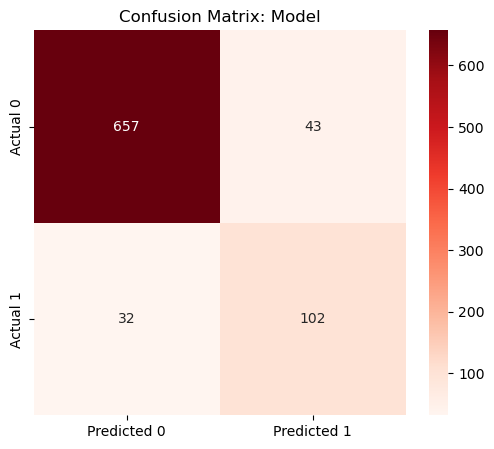

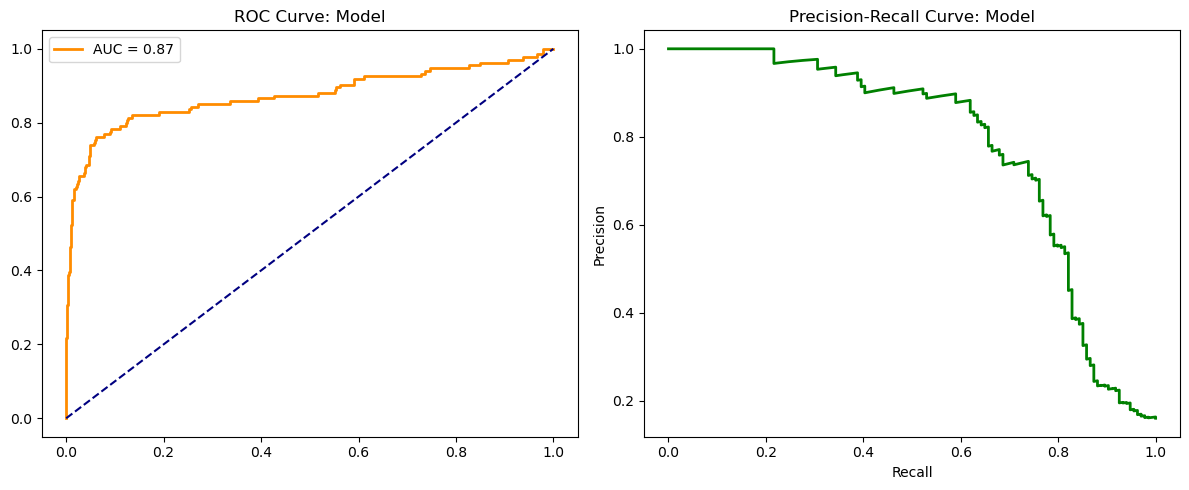

In [ ]:
#Training XGBoost
trainer = ModelTrainer()
tester = ModelTester()
xgb_model = trainer.train("xgboost", X_train, y_train)
results = tester.evaluate(xgb_model, X_test, y_test)

--- Applying SMOTE to balance classes ---
--- Training logistic_regression ---

==================== Model EVALUATION ====================
              precision    recall  f1-score   support

  Stayed (0)       0.93      0.77      0.84       700
 Churned (1)       0.37      0.69      0.48       134

    accuracy                           0.76       834
   macro avg       0.65      0.73      0.66       834
weighted avg       0.84      0.76      0.78       834



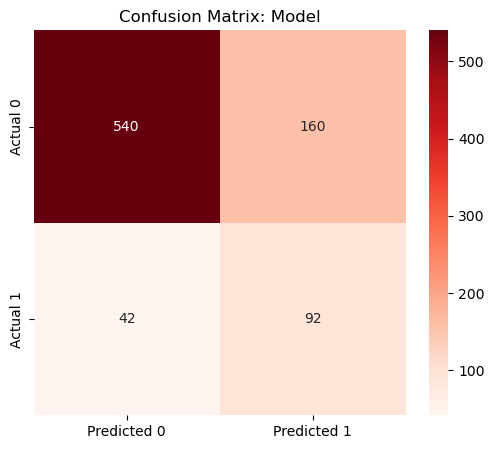

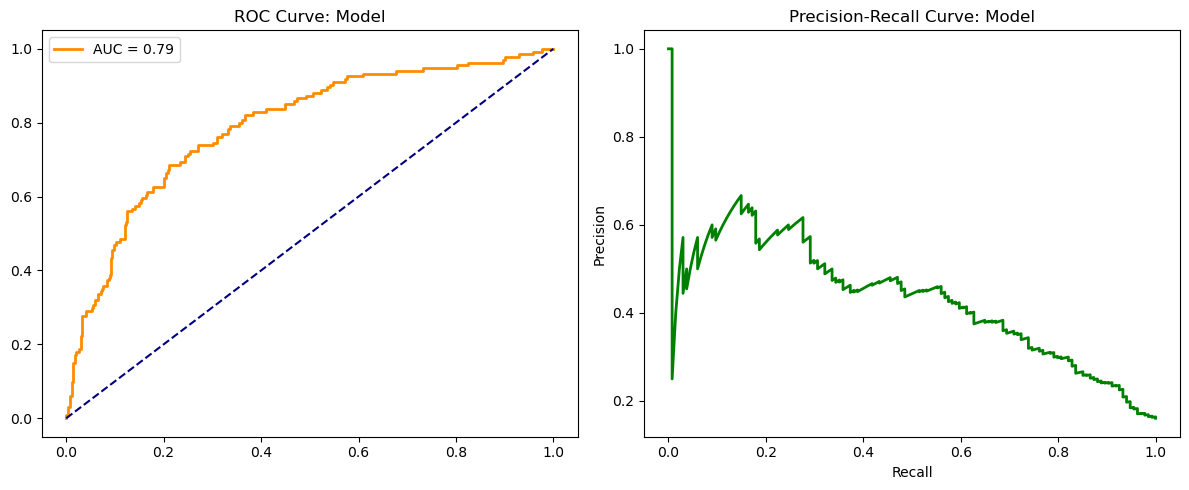

In [ ]:
#Training Logistic Regression model
log_reg=trainer.train('logistic_regression',X_train,y_train)
results=tester.evaluate(log_reg,X_test,y_test)

--- Applying SMOTE to balance classes ---
--- Training random_forest ---

==================== Model EVALUATION ====================
              precision    recall  f1-score   support

  Stayed (0)       0.95      0.95      0.95       700
 Churned (1)       0.73      0.75      0.74       134

    accuracy                           0.92       834
   macro avg       0.84      0.85      0.85       834
weighted avg       0.92      0.92      0.92       834



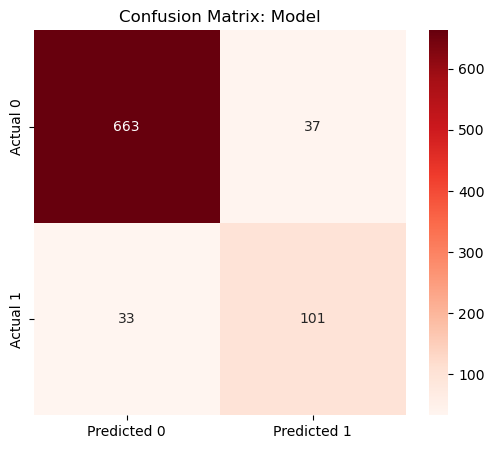

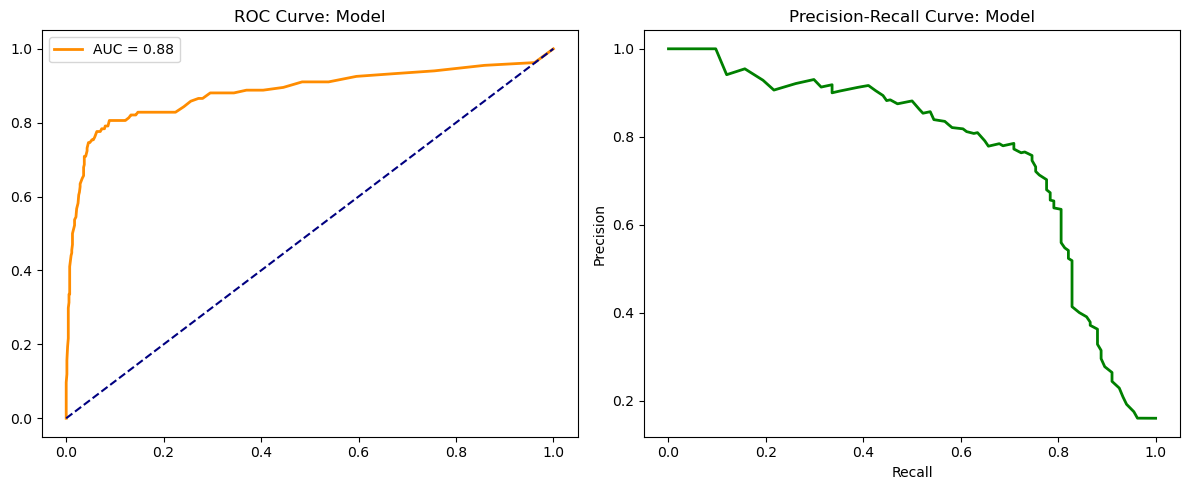

In [ ]:
#Training Random Forest Classifier
rand_forest=trainer.train('random_forest',X_train, y_train)
results=tester.evaluate(rand_forest,X_test,y_test)

--- Applying SMOTE to balance classes ---
--- Training gaussian_nb ---

==================== Model EVALUATION ====================
              precision    recall  f1-score   support

  Stayed (0)       0.93      0.87      0.90       700
 Churned (1)       0.49      0.66      0.57       134

    accuracy                           0.84       834
   macro avg       0.71      0.77      0.73       834
weighted avg       0.86      0.84      0.85       834



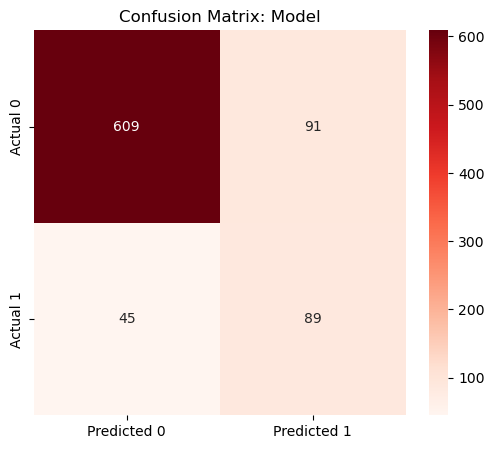

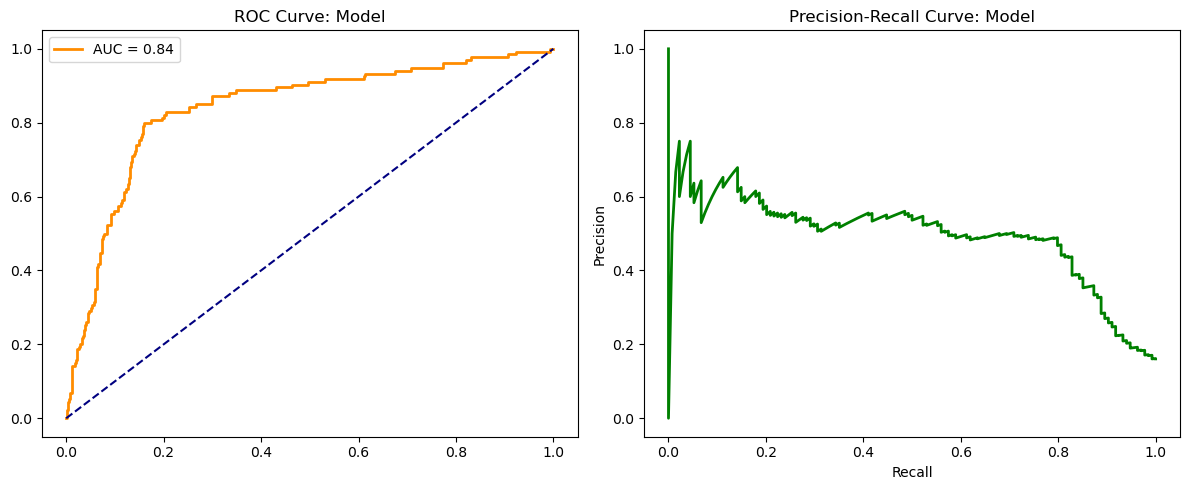

In [ ]:
#Training Gaussian naive bayes
gb=trainer.train('gaussian_nb',X_train,y_train)
results=tester.evaluate(gb,X_test,y_test)